# **Task No 2 (Part a)**     
## Submitted by ***Aqsa Abu Bakar(400517)***

---



For sentiment analysis you are required to use the sarcasm news dataset. (given n input from the dataset/random input your code should tell if there is sarcasm in it or not.) (two portions in test file. 1 for performance metrics on running on test_set and one for random input from the user to detect sarcasm.) https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

## **Loading the Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


## **Installing the Libraries**

In [2]:
!pip install gradio

## **Importing the Libraries**

In [3]:
import numpy as np
import requests
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import json
from tensorflow.keras.utils import plot_model
import graphviz
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import numpy as np
import nltk
nltk.download('stopwords')
import pickle
nltk.download('punkt')
import gradio as gr
import pickle
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
import gradio as gr
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import tensorflow as tf
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

## **Loading the Model & Tokenizer**

In [4]:
def load_objects():
    global loaded_tokenizer, loaded_model, max_len
    with open('/content/drive/My Drive/Aqsa Abu Bakar(DL-ProjectT2b)/Sentiment_tokenizer.pkl', 'rb') as handle:
        loaded_tokenizer = pickle.load(handle)

    with open('/content/drive/My Drive/Aqsa Abu Bakar(DL-ProjectT2b)/max_len.pkl', 'rb') as max_len_file:
        max_len = pickle.load(max_len_file)

    loaded_model = tf.keras.models.load_model('/content/drive/My Drive/Aqsa Abu Bakar(DL-ProjectT2b)/sarcasm_model.h5')

In [5]:
load_objects()

## **Evaluating on the Test set**

In [6]:
def load_json_file(file_path):
    response = requests.get(file_path)
    data = json.loads(response.text)
    return data
# Load JSON data from the URL
data = load_json_file('https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json')

## **Testing The Model from Random Input from User**

In [7]:
# Now you can work with the loaded JSON data
# For example, you can extract headlines and labels
headlines = [entry['headline'] for entry in data]
labels = [entry['is_sarcastic'] for entry in data]
headlines = [d['headline'] for d in data]
labels = [d['is_sarcastic'] for d in data]
# Convert labels to binary
labels = np.array(labels)

In [8]:
sequences = loaded_tokenizer.texts_to_sequences(headlines)

In [9]:
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

## **Split data into training and test sets**

In [10]:
from sklearn.model_selection import train_test_split
X_temp, x_test, y_temp, y_test = train_test_split(padded_sequences, labels, test_size=0.15, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.15/0.75, random_state=42)

## **Convert data to numpy arrays**

In [11]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## **Evaluating in the test set**

In [12]:
y_pred = loaded_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

126/126 [==============================] - 3s 15ms/step


In [13]:
# Assuming 'model' is your trained model
loss, accuracy = loaded_model.evaluate(x_test, y_test, verbose=0)
print("Test loss: ", loss)
print("Test accuracy: ", accuracy)

Test loss:  0.3953497111797333
Test accuracy:  0.8467681407928467


## **Evaluation Metrics**

In [14]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8467681557274769
Precision: 0.8173184357541899
Recall: 0.836
F1 Score: 0.8265536723163842
Confusion Matrix:
[[1930  327]
 [ 287 1463]]


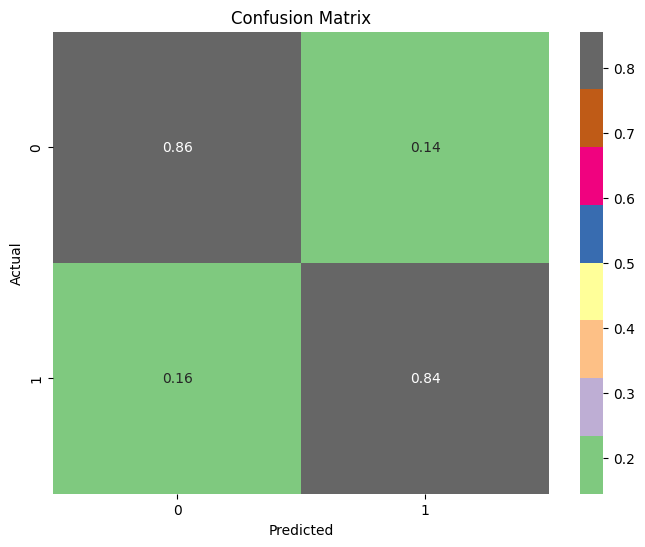

In [15]:
import seaborn as sns
# Assuming that y_test and y_pred are already defined
y_test = y_test
y_pred = y_pred

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Define the labels for the x and y axis
class_labels = [0, 1] # Replace with the actual labels for your classification problem
tick_marks = [i for i, _ in enumerate(class_labels)]

# Normalize the confusion matrix
norm_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(norm_conf_matrix, annot=True, fmt='.2f',cmap="Accent", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### **Analyzing the sentiments of the input text**

In [16]:
def analyze_sentiment(text):
    # Using TextBlob for sentiment analysis
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity

    # Using Sentiment Analysis Intensity for sentiment analysis
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    compound_polarity = scores['compound']
    positive_polarity = scores['pos']
    negative_polarity = scores['neg']
    neutral_polarity = scores['neu']

    return {
        'TextBlob_Polarity': polarity,
        'TextBlob_Subjectivity': subjectivity,
        'SAI_Compound_Polarity': compound_polarity,
        'SAI_Positive_Polarity': positive_polarity,
        'SAI_Negative_Polarity': negative_polarity,
        'SAI_Neutral_Polarity': neutral_polarity
    }


## **Predictions from Random Input**

In [ ]:
def is_sarcastic(input_text):
    # Preprocess input
    input_text = input_text.lower()
    sequence = loaded_tokenizer.texts_to_sequences([input_text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post')
    # Make prediction using the loaded model
    prediction = loaded_model.predict(padded_sequence)
    # Analyze sentiment using TextBlob and Sentiment Analysis Intensity
    sentiment_results = analyze_sentiment(input_text)
    results_list = []

    # Define colors for each metric
    metric_colors = {
        'TextBlob_Polarity': 'cyan',
        'TextBlob_Subjectivity': 'green',
        'SAI_Compound_Polarity': 'pink',
        'SAI_Positive_Polarity': 'orange',
        'SAI_Negative_Polarity': 'red',
        'SAI_Neutral_Polarity': 'yellow'
    }

    for metric, value in sentiment_results.items():
        # Use the metric_colors dictionary to get the color for the current metric
        color = metric_colors.get(metric, 'black')
        result_str = f"<span style='color: {color}; font-size: 20px'>{metric}: {value}</span>"
        results_list.append(result_str)

    # Interpret prediction
    if prediction[0][0] > 0.5:
        result_message = "The sentence is Sarcastic"
    else:
        result_message = "The sentence is NOT Sarcastic"

    # Combine all results into a single variable with HTML styling
    combined_result = "<br>".join([
        f"<span style='color: {'green' if 'Positive' in result else 'red' if 'Negative' in result else 'yellow'}; font-size: 18px'>{result}</span>"
        for result in results_list
    ])

    # Determine color for result_message
    result_message_color = 'white' if 'Sarcastic' in result_message else 'orange'

    # Create final result with color for result_message and combined_result
    final_result = f"<span style='color: {result_message_color}; font-size: 30px'>{result_message}</span><br>{combined_result}"

    return final_result


load_objects()
iface = gr.Interface(fn=is_sarcastic, inputs="text", outputs="html")
iface.launch(debug=True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://8072b494a2a54df21f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 31ms/step
